Firt name: Kamiar (Kamy)\
Last name: Asgari (Gary)\
USC ID: 4590556658\
Github Username: kamiarasgari

# 1. Time Series Classification Part 1: Feature Creation/Extraction

In [110]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

## (1-a) dataset

In [111]:
root = '../data/AReM/'
folders = ['bending1' , 'bending2' , 'cycling' , 'lying' , 'sitting' , 'standing' , 'walking']

## (1-b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [112]:
test_directory = ['../data/AReM/bending1/dataset1.csv' , '../data/AReM/bending1/dataset2.csv' ,
                  '../data/AReM/bending2/dataset1.csv' , '../data/AReM/bending2/dataset2.csv' , 
                  '../data/AReM/cycling/dataset1.csv' , '../data/AReM/cycling/dataset2.csv' , '../data/AReM/cycling/dataset3.csv' , 
                  '../data/AReM/lying/dataset1.csv' , '../data/AReM/lying/dataset2.csv' , '../data/AReM/lying/dataset3.csv' , 
                  '../data/AReM/sitting/dataset1.csv' , '../data/AReM/sitting/dataset2.csv' , '../data/AReM/sitting/dataset3.csv' ,
                  '../data/AReM/standing/dataset1.csv' , '../data/AReM/standing/dataset2.csv' , '../data/AReM/standing/dataset3.csv' ,
                  '../data/AReM/walking/dataset1.csv' , '../data/AReM/walking/dataset2.csv' , '../data/AReM/walking/dataset3.csv']

X_test = []
X_train = []
y_test = []
y_train = []
for i in range(len(folders)):
    directory = root + folders[i] +'/*.csv'
    for file in glob.glob(directory):
        try:
            csv = pd.read_csv(file, skiprows=5, header=None, dtype=float)
        except Exception as e:
            csv = pd.read_csv(file, skiprows=5, header=None, dtype=float, sep='\\s+') # handles the bending2/dataset4.csv

        if file in test_directory:
            X_test.append(csv.values)
            y_test.append(folders[i])
        else:
            X_train.append(csv.values)
            y_train.append(folders[i])

## (1-c-i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

Other than minimum, maximum, mean, we can use:
- standard deviation
- first quartile
- third quartile
- distribution
- entropy
- Autocorrelation
- stationarity
- Kurtosis
- scaling properties

## (1-c-ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [113]:
new_label = ['min', 'max', 'mean', 'median', 'std', '1st_quartile', '3rd_quartile']
new_label_numbered = []
for j in range(6):    
    for i in range(len(new_label)):
        new_label_numbered.append(new_label[i]+'_'+str(j+1))        

In [114]:
# train data
new_train_stats = np.zeros((7*6,len(X_train)))

for k in range(len(X_train)):
    x = X_train[k]

    new_train_stats[0::7,k] = np.min(x[: , 1:], axis=0)
    new_train_stats[1::7,k] = np.max(x[: , 1:], axis=0)
    new_train_stats[2::7,k] = np.mean(x[: , 1:], axis=0)
    new_train_stats[3::7,k] = np.median(x[: , 1:], axis=0)
    new_train_stats[4::7,k] = np.std(x[: , 1:], axis=0)
    new_train_stats[5::7,k] = np.percentile(x[: , 1:], 25, axis=0)
    new_train_stats[6::7,k] = np.percentile(x[: , 1:], 75, axis=0)
    
     
df_train = pd.DataFrame(data=np.transpose(new_train_stats), columns=new_label_numbered)
df_train['Label'] = y_train
print(' **************** trainig data **************** ')
print(df_train)

# test data
new_test_stats = np.zeros((7*6,len(X_test)))

for k in range(len(X_test)):
    x = X_test[k]

    new_test_stats[0::7,k] = np.min(x[: , 1:], axis=0)
    new_test_stats[1::7,k] = np.max(x[: , 1:], axis=0)
    new_test_stats[2::7,k] = np.mean(x[: , 1:], axis=0)
    new_test_stats[3::7,k] = np.median(x[: , 1:], axis=0)
    new_test_stats[4::7,k] = np.std(x[: , 1:], axis=0)
    new_test_stats[5::7,k] = np.percentile(x[: , 1:], 25, axis=0)
    new_test_stats[6::7,k] = np.percentile(x[: , 1:], 75, axis=0)
        
df_test = pd.DataFrame(data=np.transpose(new_test_stats), columns=new_label_numbered)
df_test['Label'] = y_test
print(' **************** test data **************** ')
print(df_test)

 **************** trainig data **************** 
    min_1  max_1     mean_1  median_1     std_1  1st_quartile_1  \
0   33.00  45.75  41.678063     41.75  2.241152           41.33   
1   37.00  48.00  43.454958     43.25  1.384653           42.50   
2   35.00  47.40  43.954500     44.33  1.557210           43.00   
3   36.25  48.00  43.969125     44.50  1.616677           43.31   
4   33.00  47.75  42.179812     43.50  3.666840           39.15   
..    ...    ...        ...       ...       ...             ...   
64  18.33  47.67  34.333042     34.75  4.943612           31.25   
65  19.50  46.00  34.546229     35.25  4.837247           31.25   
66  19.75  45.50  34.322750     35.25  4.747524           31.00   
67  15.50  43.67  34.225875     34.75  4.437168           31.25   
68  18.00  46.00  35.193333     36.00  4.746916           32.00   

    3rd_quartile_1  min_2  max_2    mean_2  ...  1st_quartile_5  \
0          42.7500    0.0   2.83  0.535979  ...         28.4575   
1          4

In [115]:
# combined trian and test dataset
combined_df = pd.concat([df_train, df_test])
display(combined_df.reset_index(drop=True))

,min_1,max_1,mean_1,median_1,std_1,1st_quartile_1,3rd_quartile_1,min_2,max_2,mean_2,...,1st_quartile_5,3rd_quartile_5,min_6,max_6,mean_6,median_6,std_6,1st_quartile_6,3rd_quartile_6,Label
0,33.00,45.75,41.678063,41.750,2.241152,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.250,0.0,1.79,0.383292,0.430,0.388759,0.000,0.500,bending1
1,37.00,48.00,43.454958,43.250,1.384653,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.000,0.0,5.26,0.679646,0.500,0.621885,0.430,0.870,bending1
2,35.00,47.40,43.954500,44.330,1.557210,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.500,0.0,1.79,0.493292,0.430,0.512971,0.000,0.940,bending1
3,36.25,48.00,43.969125,44.500,1.616677,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.750,0.0,2.96,0.555312,0.490,0.487318,0.000,0.830,bending1
4,33.00,47.75,42.179812,43.500,3.666840,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.330,0.0,2.18,0.613521,0.500,0.523771,0.000,1.000,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,32.75,47.00,42.760562,44.500,3.395376,41.33,45.3725,0.0,3.34,0.486167,...,13.0000,18.565,0.0,5.73,0.842271,0.710,0.721413,0.430,1.090,standing
84,33.33,48.00,44.334729,45.000,2.474358,42.25,46.5000,0.0,3.90,0.432958,...,9.3300,17.750,0.0,5.02,0.933000,0.830,0.672907,0.470,1.250,standing
85,12.50,45.00,33.509729,34.125,4.845868,30.50,36.7500,0.0,13.05,4.450771,...,14.6275,18.750,0.0,8.96,3.378479,3.085,1.785497,2.060,4.440,walking
86,15.00,46.75,34.660583,35.000,5.309571,31.00,38.2500,0.0,13.44,4.200896,...,14.2500,18.500,0.0,8.99,3.244396,3.000,1.629283,2.120,4.240,walking


## (1-c-iii). Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [116]:
confidence_level = 0.9 

print('******* trainig data ********\n')

for i in range(new_train_stats.shape[0]):
    feature_data = new_train_stats[i]
    
    # bootstrap resampling
    resampled = bs.bootstrap(feature_data, stat_func=bs_stats.std)
    
    # Calculate confidence interval
    lower_bound = resampled.lower_bound
    upper_bound = resampled.upper_bound
    
    print(new_label_numbered[i])
    print('Standard Deviation: ' +str(resampled.value))
    print('Confidence Interval: ['+str(lower_bound) +', ' + str(upper_bound)+']\n')


******* trainig data ********

min_1
Standard Deviation: 8.730335507644277
Confidence Interval: [7.2530591647247, 10.157674300545882]

max_1
Standard Deviation: 4.396968872496197
Confidence Interval: [3.2410909848027556, 5.739059186501396]

mean_1
Standard Deviation: 4.88195084823011
Confidence Interval: [4.272198708990158, 5.567340624252542]

median_1
Standard Deviation: 4.920065980691553
Confidence Interval: [4.274178714263765, 5.642314109668115]

std_1
Standard Deviation: 1.7440194619186855
Confidence Interval: [1.5239573624844156, 1.9939014697867665]

1st_quartile_1
Standard Deviation: 5.689579610267081
Confidence Interval: [5.120411150810167, 6.358814378545013]

3rd_quartile_1
Standard Deviation: 4.748854525045172
Confidence Interval: [3.8534380427486843, 5.7302494351713]

min_2
Standard Deviation: 0.0
Confidence Interval: [0.0, 0.0]

max_2
Standard Deviation: 5.1104020708523406
Confidence Interval: [4.662415405491045, 5.696830084466034]

mean_2
Standard Deviation: 1.5890192093363

In [117]:
print('******* test data ********\n')

for i in range(new_test_stats.shape[0]):
    feature_data = new_test_stats[i]
    
    # bootstrap resampling
    resampled = bs.bootstrap(feature_data, stat_func=bs_stats.std)
    
    # Calculate confidence interval
    lower_bound = resampled.lower_bound
    upper_bound = resampled.upper_bound
    
    print(new_label_numbered[i])
    print('Standard Deviation: ' +str(resampled.value))
    print('Confidence Interval: ['+str(lower_bound) +', ' + str(upper_bound)+']\n')


******* test data ********

min_1
Standard Deviation: 11.812515382745117
Confidence Interval: [8.74586586372643, 15.750889318040135]

max_1
Standard Deviation: 4.262538421529341
Confidence Interval: [1.9637609900976152, 6.887719958210651]

mean_1
Standard Deviation: 6.60898479803812
Confidence Interval: [5.181741050331421, 8.837279616048422]

median_1
Standard Deviation: 6.899035642594111
Confidence Interval: [5.4463057875307435, 9.122275478040446]

std_1
Standard Deviation: 1.8175321524442136
Confidence Interval: [1.3147684184192792, 2.441013703465533]

1st_quartile_1
Standard Deviation: 7.468400284177941
Confidence Interval: [6.1786427023926045, 9.461580513097346]

3rd_quartile_1
Standard Deviation: 6.215403317587445
Confidence Interval: [4.669358513178637, 8.85024911715597]

min_2
Standard Deviation: 0.0
Confidence Interval: [0.0, 0.0]

max_2
Standard Deviation: 4.740494498324269
Confidence Interval: [3.9708094066989297, 6.154698716897942]

mean_2
Standard Deviation: 1.4605074560128

In [118]:
confidence_level = 0.9 

print('******* All the data ********\n')

for i in range(len(new_label_numbered)):
    feature_data = np.array(combined_df[new_label_numbered[i]])
    
    # bootstrap resampling
    resampled = bs.bootstrap(feature_data, stat_func=bs_stats.std)
    
    # Calculate confidence interval
    lower_bound = resampled.lower_bound
    upper_bound = resampled.upper_bound
    
    print(new_label_numbered[i])
    print('Standard Deviation: ' +str(resampled.value))
    print('Confidence Interval: ['+str(lower_bound) +', ' + str(upper_bound)+']\n')


******* All the data ********

min_1
Standard Deviation: 9.515445066931841
Confidence Interval: [8.084105920389511, 10.969486089951943]

max_1
Standard Deviation: 4.36932238296287
Confidence Interval: [3.3086598244858587, 5.61066000507248]

mean_1
Standard Deviation: 5.3053144612396865
Confidence Interval: [4.646793593079069, 6.032664794570046]

median_1
Standard Deviation: 5.409056425357996
Confidence Interval: [4.739907905255603, 6.174020995793332]

std_1
Standard Deviation: 1.7602191698745813
Confidence Interval: [1.547937592572544, 1.9919140138942812]

1st_quartile_1
Standard Deviation: 6.118526249454473
Confidence Interval: [5.529794269190466, 6.804499440212329]

3rd_quartile_1
Standard Deviation: 5.109642753365408
Confidence Interval: [4.270691013603235, 6.050721124094703]

min_2
Standard Deviation: 0.0
Confidence Interval: [0.0, 0.0]

max_2
Standard Deviation: 5.033881679163113
Confidence Interval: [4.627386689081823, 5.561706223676018]

mean_2
Standard Deviation: 1.565194252074

## (1-c-iv). Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

In [119]:
newer_label_numbered = []
for i in range(len(new_label)):    
    for j in range(6):    
        newer_label_numbered.append(new_label[i]+'_'+str(j+1))        

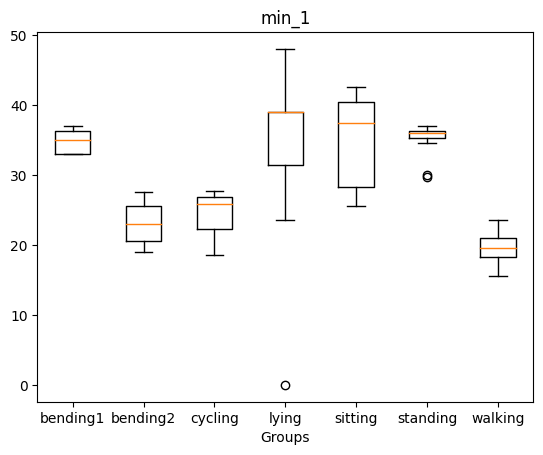

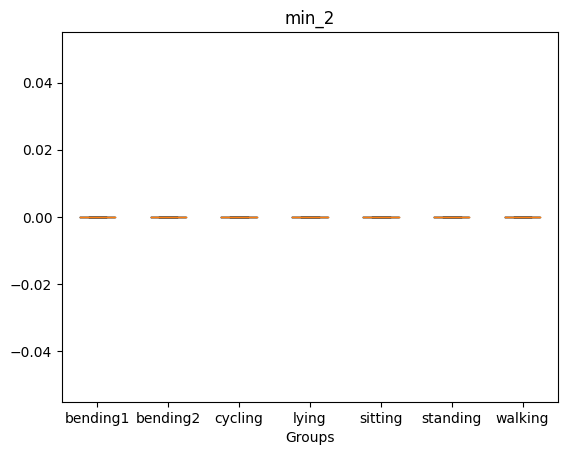

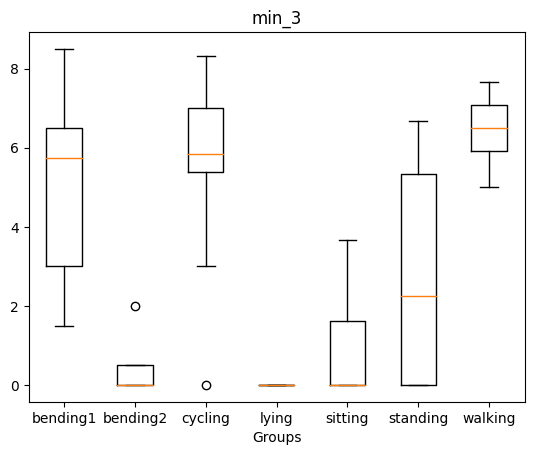

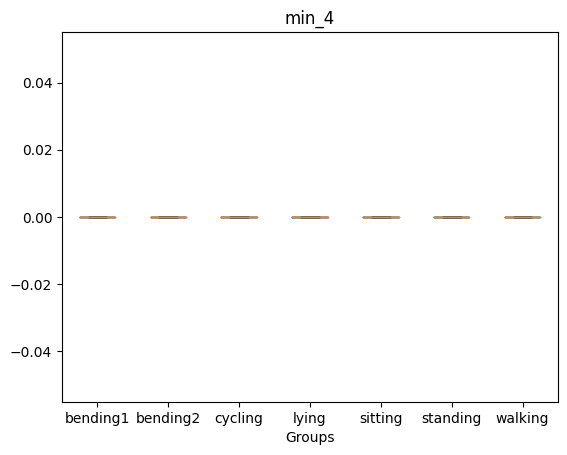

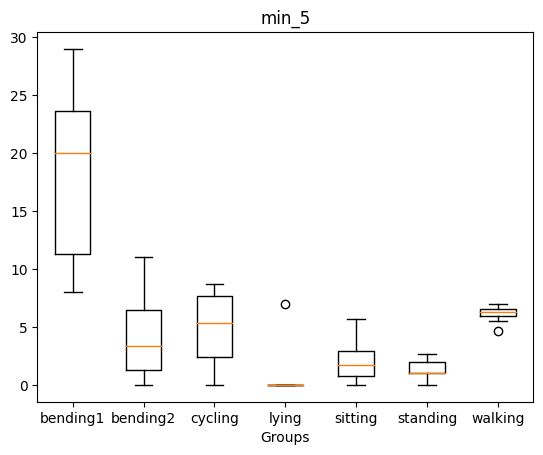

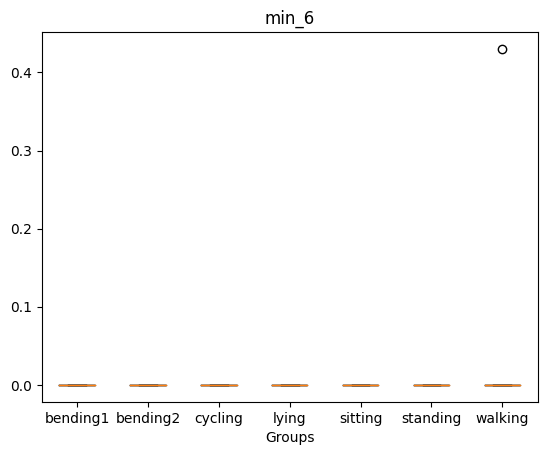

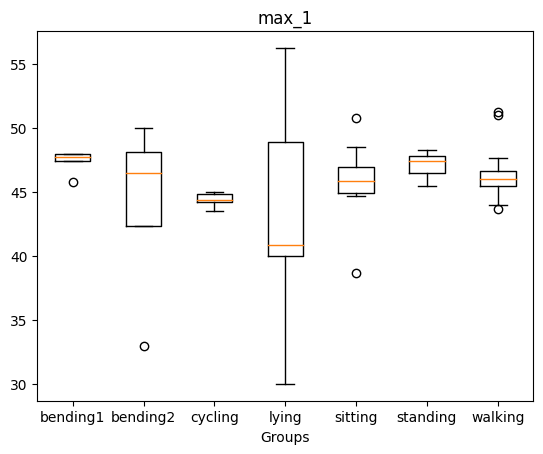

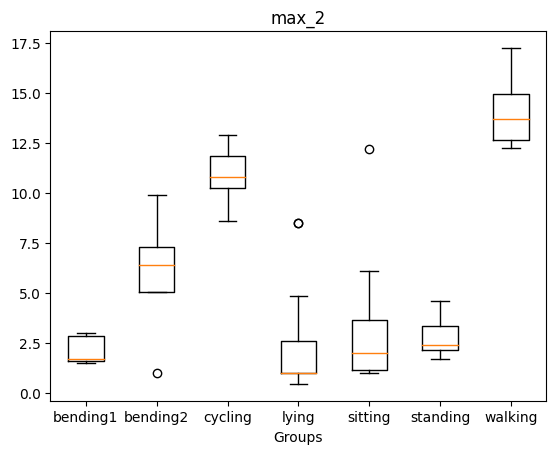

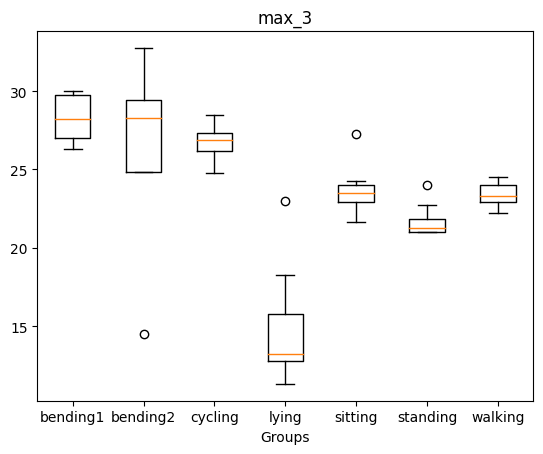

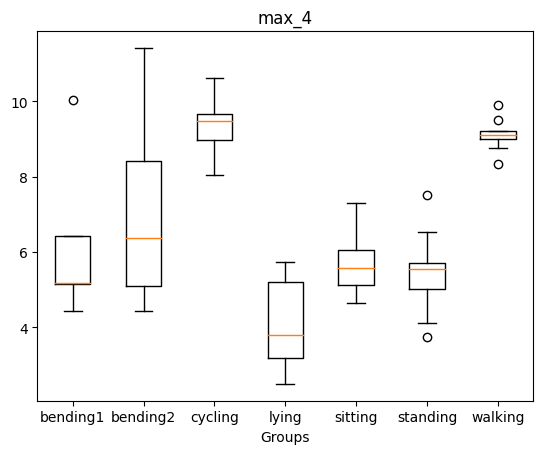

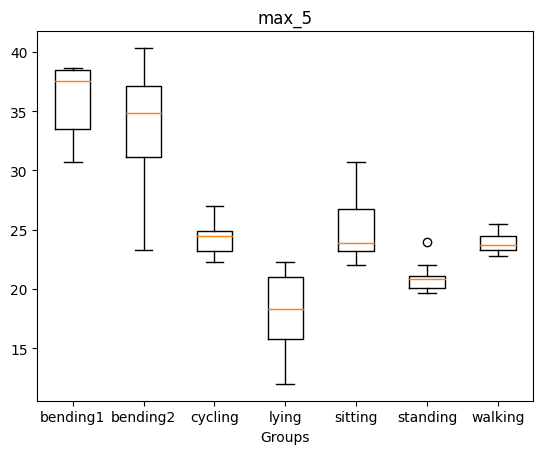

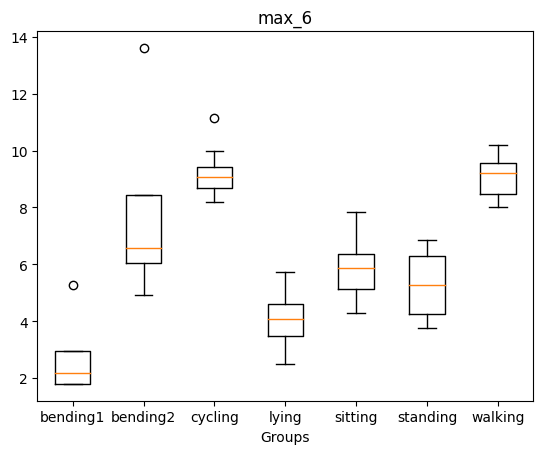

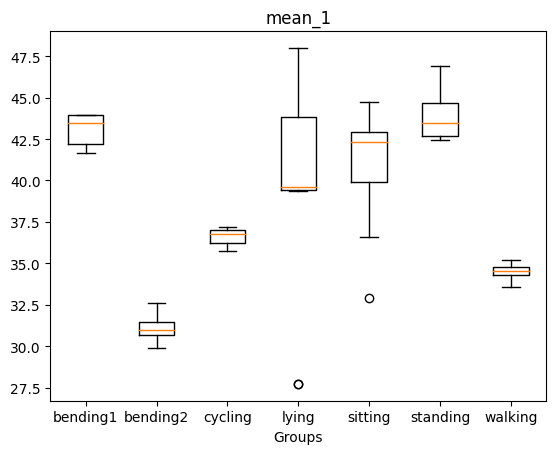

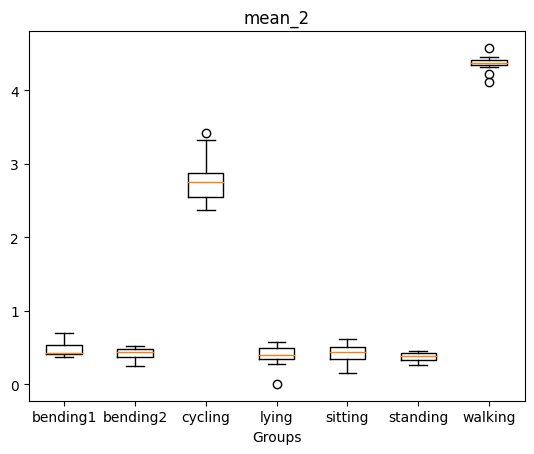

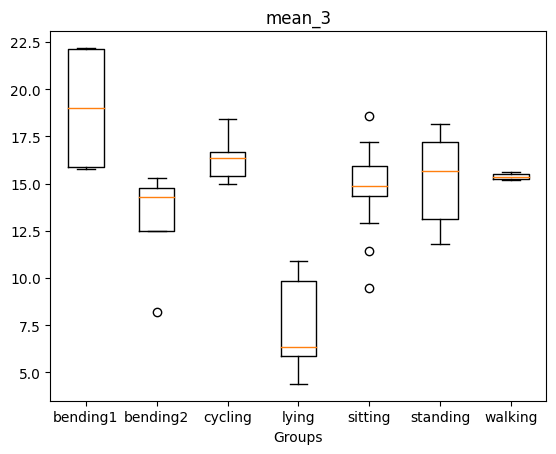

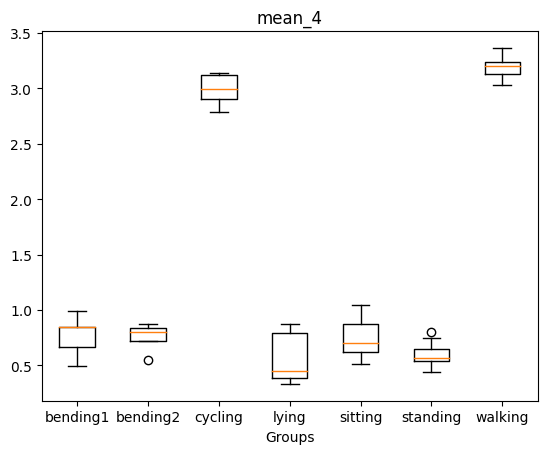

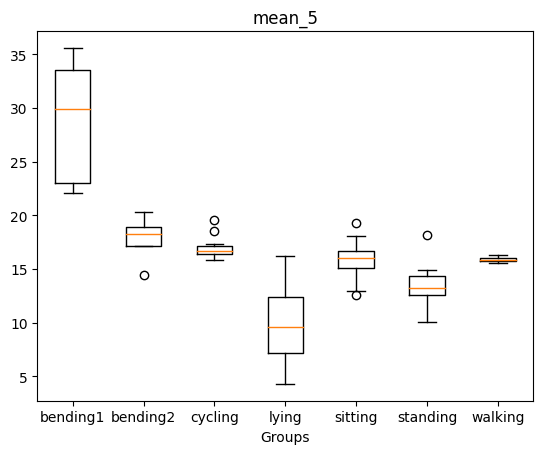

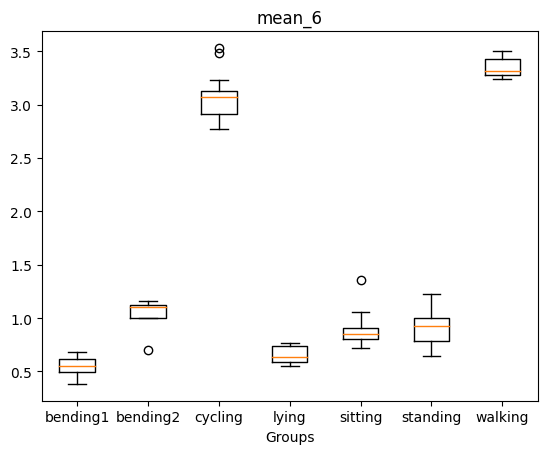

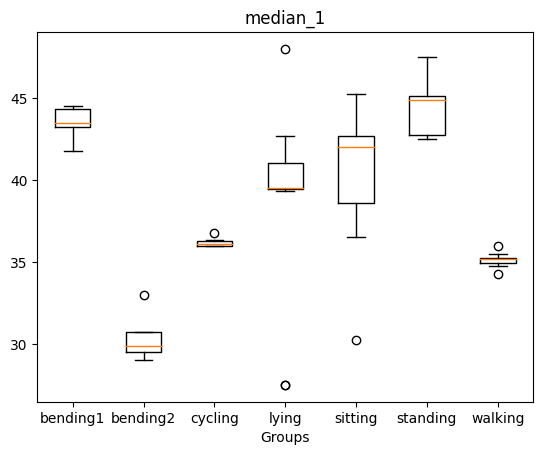

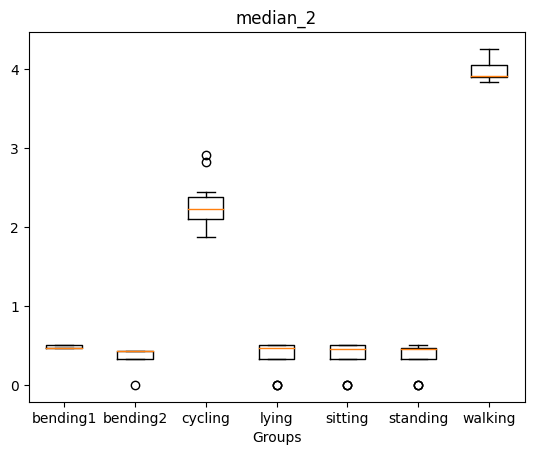

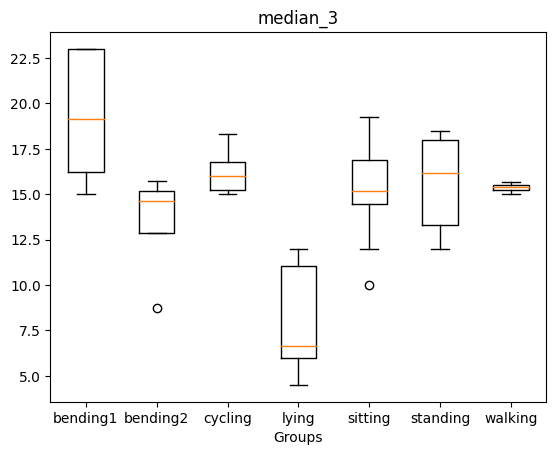

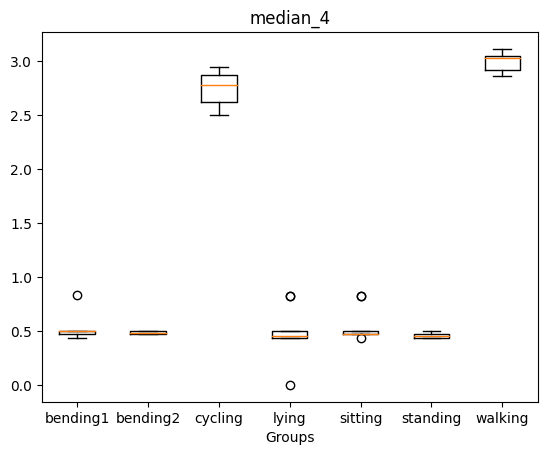

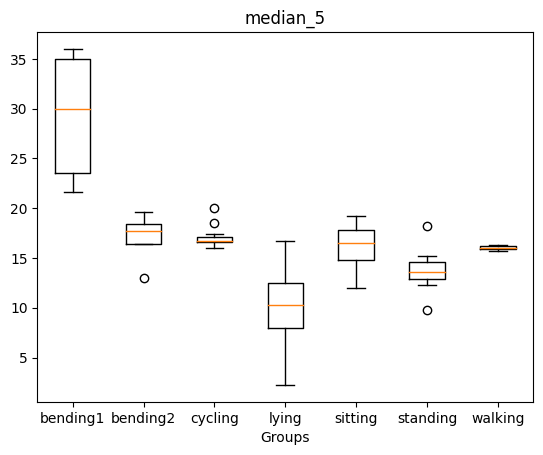

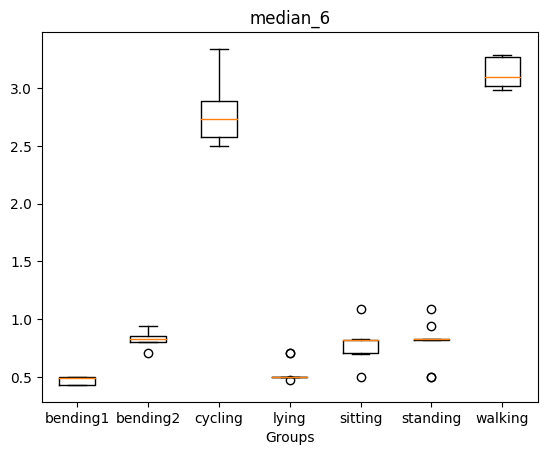

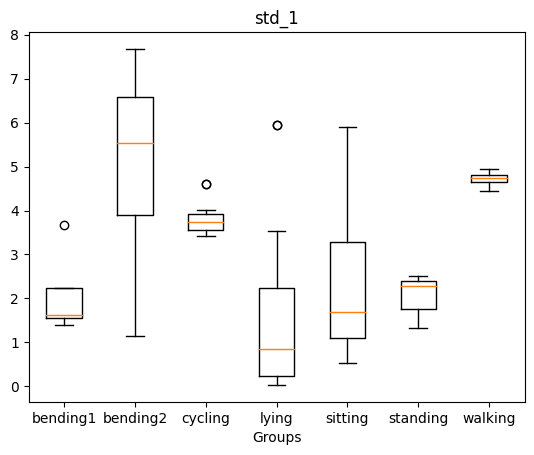

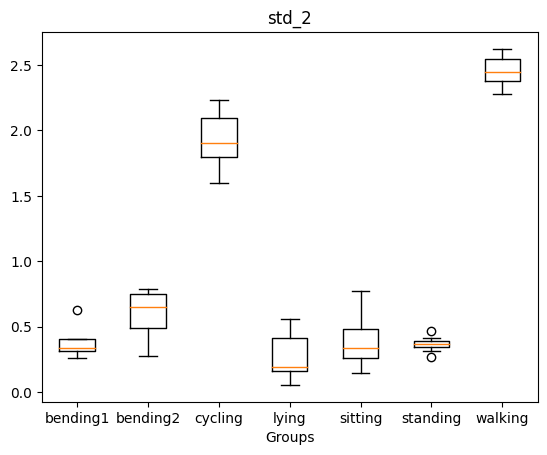

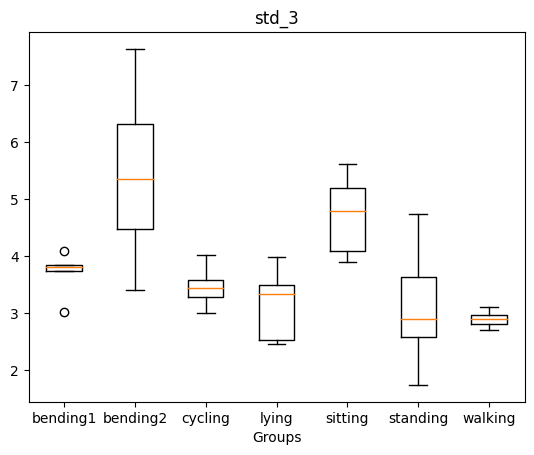

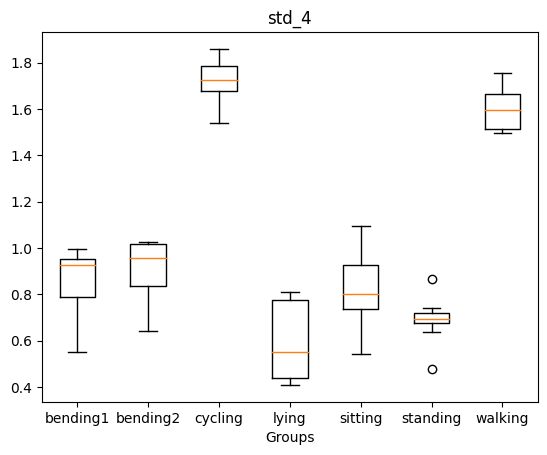

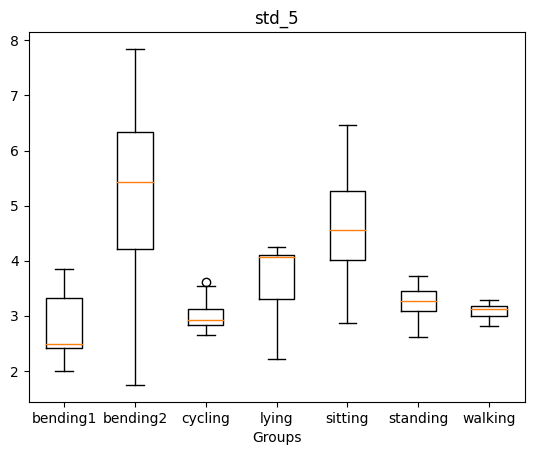

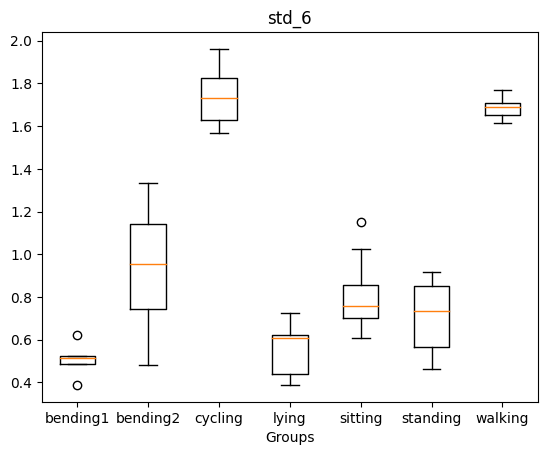

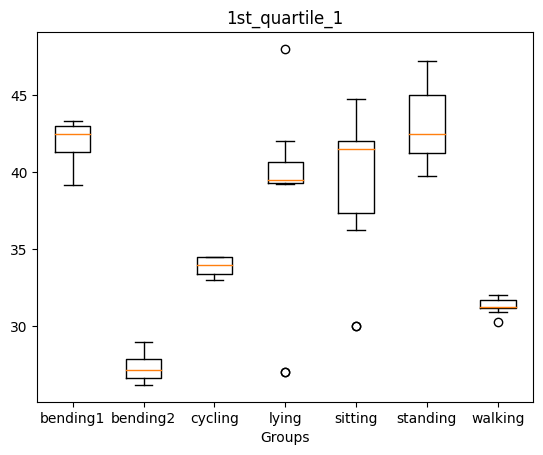

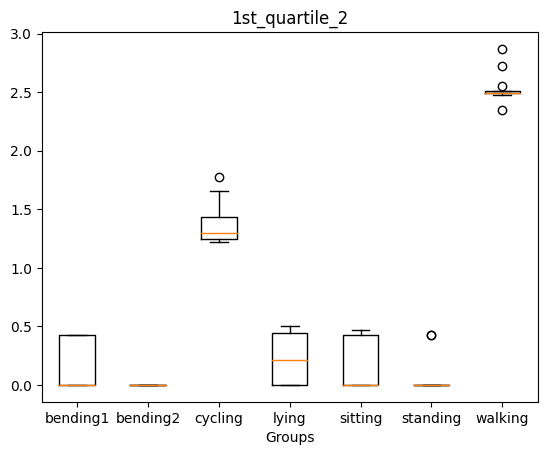

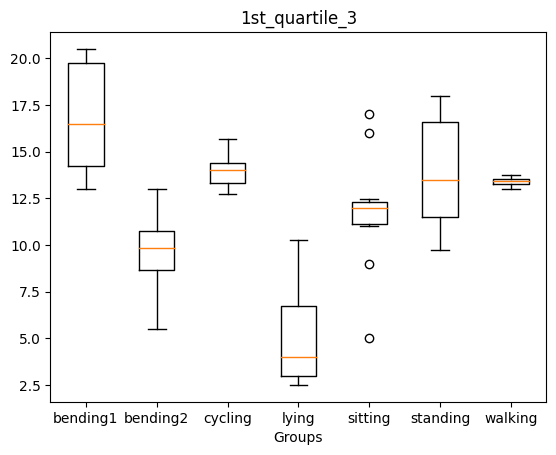

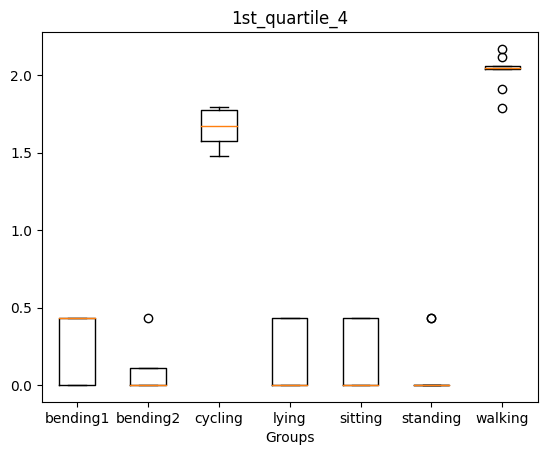

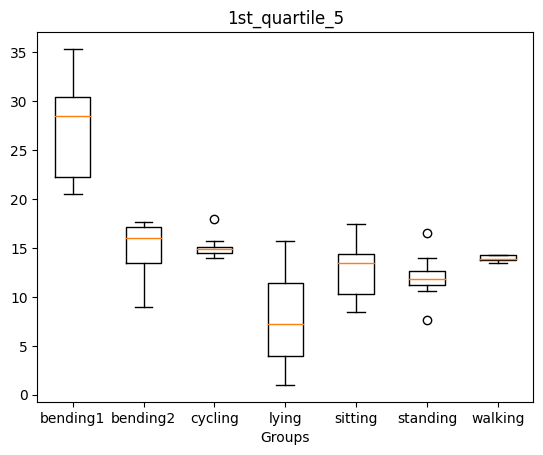

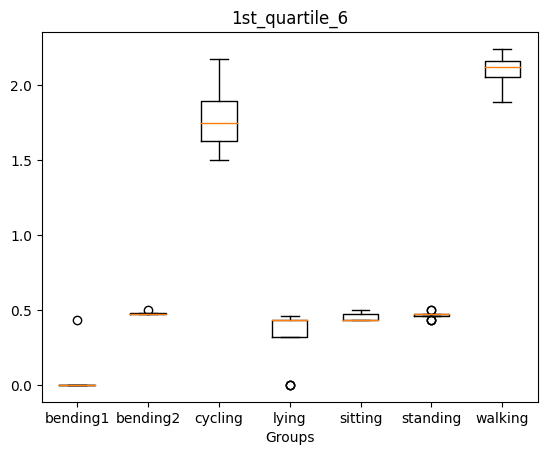

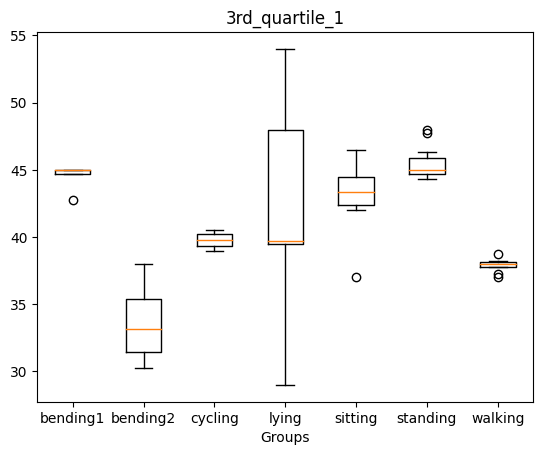

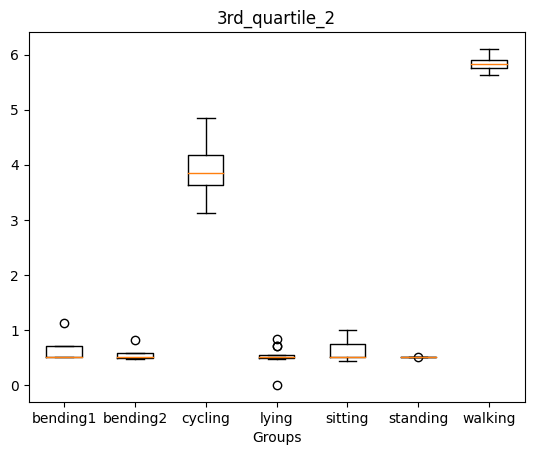

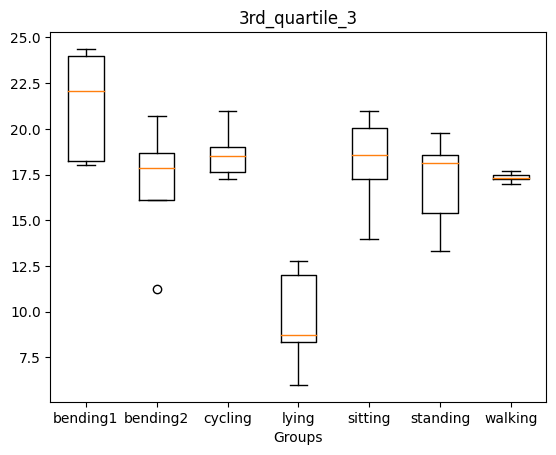

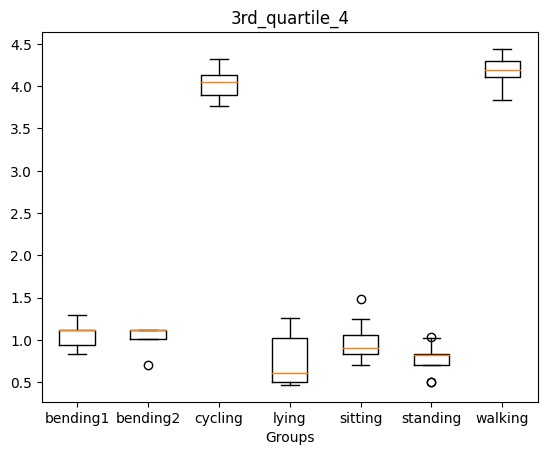

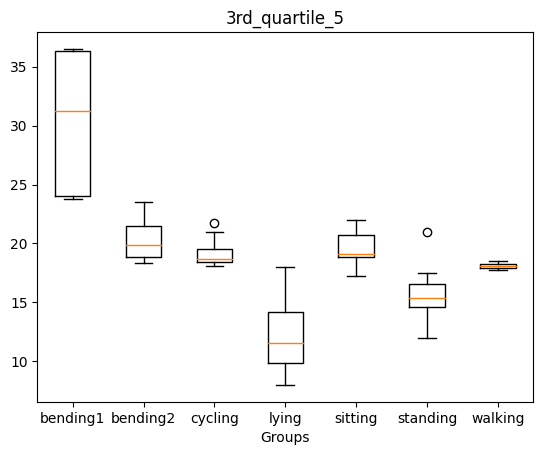

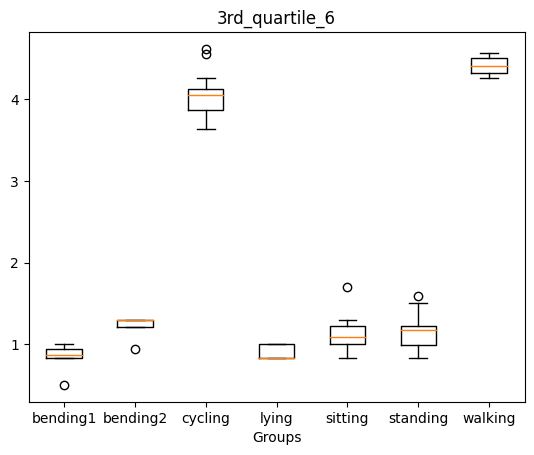

In [120]:
# only using training data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(newer_label_numbered)):
    selected_data=[]
    for j in range(len(folders)):
        selected_data.append(df_train.loc[df_train['Label'] == folders[j], newer_label_numbered[i]])
    plt.boxplot(selected_data)
    plt.xlabel('Groups')
    plt.title(newer_label_numbered[i])
    plt.xticks(range(1, len(folders) + 1), folders)
    plt.show()
    

I think the 'first quantiles' and the 'second quantiles' are giving a good way of distingushing the classes. Combined with 'mean' they should be the best three.

# 2. ISLR 3.7.4

## (a) The polynomial regression will have a lower training RSS than the linear regression because it is more complex and could fit toughter against data.

## (b) The polynomial regression (with a high probability) wiil have a higher test RSS as the overfit from training would have more error than the linear regression.



## (c)  Polynomial regression will have a lower train RSS than the linear fit because it includes the linear model (it is stricly mor flexible, or in another word, it is more coplex.)



## (d) The information provided is insufficient.